[Estimating PV parameters](https://pvlib-python.readthedocs.io/en/stable/api.html#estimating-pv-model-parameters)

[Functions for fitting the single diode equation](https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.ivtools.sde.fit_sandia_simple.html#pvlib.ivtools.sde.fit_sandia_simple), given I and V.

In [137]:
import pvlib
import numpy as np

In [138]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

#CS Iluminada
def func(I, V, I_L, I_0, n, R_S, R_sh):
    # Constante de Boltzmann
    k = 1.38064852*10**(-23) # [J.K^-1]
    T = 300 # [K]
    q = 1.60217662*10**(-19) # [C], carga do elétron
    I = func(I, V, I_L, I_0, n, R_S, R_sh)
    return I_L-I_0 * (np.exp(-q * (V + I*R_S)/(n*k*T)) - 1) - (V + I*R_S)/R_sh

# Define the data to be fit with some noise:



In [140]:
df_fit = pd.read_csv('Curves without parameters 3975.txt', sep='\t', header = 0)
df_fit = df_fit.fillna('') #Preche espaços nulos com uma string vazia
df_fit.columns = df_fit.columns + " " + np.array(df_fit.iloc[0, :])#.astype(str) # Forma o nome da colun utilizando as duas primeiras linas do data frame
df_fit = df_fit.iloc[11:, :]
df_fit

,Run Id Device,L4C5 3975f2-cap,Unnamed: 2,Run Id.1 Device,L5C3 3975f5-cap,Unnamed: 5,Run Id.2 Device,L6C3 3975f8-cap,Unnamed: 8,Run Id.3 Device,Unnamed: 10 Ref GaAs,Unnamed: 11,Unnamed: 12
11,-0.09994364,0.000883137817874162,-8.82640081400008E-05,-0.09993839,0.00084598546774434,-8.45464256097663E-05,-0.0999403,0.000827642425591886,-8.27148323063808E-05,-0.07651258,0.102581422159825,-0.00784876926951738,
12,-0.09248257,0.000882819817874162,-8.16454456039345E-05,-0.09248328,0.00084580576774434,-7.82228916439148E-05,-0.09258389,0.000827923225591886,-7.66523528466444E-05,-0.07181549,0.102616722159825,-0.00736947018410168,
13,-0.08506594,0.000883026857874162,-7.5115509710312E-05,-0.08506589,0.00084642798774434,-7.20021500983814E-05,-0.085209276,0.000827439205591886,-7.05054956424998E-05,-0.067110348,0.102615362159825,-0.00688655266469188,
14,-0.077621034,0.000883143137874162,-6.8550483531797E-05,-0.077622748,0.00084635758774434,-6.56966017513668E-05,-0.077839996,0.000827472025591886,-6.44104191621843E-05,-0.062366532,0.102626622159825,-0.00640046651498263,
15,-0.070190766,0.000883406917874162,-6.20070082552865E-05,-0.070193292,0.00084613774774434,-5.93931939996408E-05,-0.070471956,0.000827491765591886,-5.83149632951537E-05,-0.05759406,0.102622242159825,-0.00591043157228748,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,,,,,,,,,,1.052203,-0.0985679298401751,-0.103713471481622,
257,,,,,,,,,,1.0569024,-0.115181317840175,-0.121735411260444,
258,,,,,,,,,,1.0616026,-0.132641001840175,-0.140812032420135,
259,,,,,,,,,,1.066289,-0.150039277840175,-0.159985231528922,


In [141]:
df_fit.columns

Index(['Run Id Device', 'L4C5 3975f2-cap', 'Unnamed: 2 ', 'Run Id.1 Device',
       'L5C3 3975f5-cap', 'Unnamed: 5 ', 'Run Id.2 Device', 'L6C3 3975f8-cap',
       'Unnamed: 8 ', 'Run Id.3 Device', 'Unnamed: 10 Ref GaAs',
       'Unnamed: 11 ', 'Unnamed: 12 '],
      dtype='object')

In [142]:
dfV = df_fit[df_fit.columns[0]]
dfV

11      -0.09994364
12      -0.09248257
13      -0.08506594
14     -0.077621034
15     -0.070190766
           ...     
256                
257                
258                
259                
260                
Name: Run Id Device, Length: 250, dtype: object

In [143]:
dfI = df_fit[df_fit.columns[1]]
dfI

11     0.000883137817874162
12     0.000882819817874162
13     0.000883026857874162
14     0.000883143137874162
15     0.000883406917874162
               ...         
256                        
257                        
258                        
259                        
260                        
Name: L4C5 3975f2-cap, Length: 250, dtype: object

In [144]:
# Tranforma uma coluna do data frame em uma array
def to_array(df):
    df_lst = []
    df_array = df
    for i in range(len(df_array)):
        if df_array[i+11] == '':
            df_lst += [0]
        else:
            df_lst += [float(df_array[i+11])]
    df_array = np.array(df_lst)
    return df_array
to_array(dfV)[0:5]

array([-0.09994364, -0.09248257, -0.08506594, -0.07762103, -0.07019077])

In [145]:
df_V = to_array(dfV)
print(len(df_V))
df_V

250


array([-0.09994364, -0.09248257, -0.08506594, -0.07762103, -0.07019077,
       -0.06274629, -0.05530124, -0.04786306, -0.04043145, -0.03299265,
       -0.02555404, -0.0181222 , -0.01072164, -0.00331426,  0.00410004,
        0.01150026,  0.01890683,  0.02635117,  0.03378182,  0.04121223,
        0.04864764,  0.05608378,  0.06351318,  0.07094922,  0.07838592,
        0.08583025,  0.09326103,  0.10069827,  0.10814222,  0.1155722 ,
        0.12300294,  0.1304471 ,  0.13789096,  0.14532118,  0.1527648 ,
        0.16020852,  0.1676519 ,  0.17508106,  0.18252416,  0.18996578,
        0.19739348,  0.20482136,  0.21225712,  0.2196919 ,  0.22712092,
        0.2345569 ,  0.2419925 ,  0.24943478,  0.2568641 ,  0.26430062,
        0.2717443 ,  0.2791742 ,  0.28660484,  0.29404856,  0.30149252,
        0.30892254,  0.31636624,  0.32380924,  0.33123822,  0.3386671 ,
        0.34610986,  0.35355262,  0.36098188,  0.36842564,  0.37586278,
        0.38329958,  0.39072956,  0.39816636,  0.4056042 ,  0.41

In [146]:
df_I = to_array(dfI)
print(len(df_I))
df_I

250


array([ 8.83137818e-04,  8.82819818e-04,  8.83026858e-04,  8.83143138e-04,
        8.83406918e-04,  8.83692798e-04,  8.83651678e-04,  8.83482398e-04,
        8.83353218e-04,  8.83063498e-04,  8.82787538e-04,  8.82705118e-04,
        8.82698278e-04,  8.82518438e-04,  8.82168678e-04,  8.82149638e-04,
        8.82254458e-04,  8.82215298e-04,  8.82206038e-04,  8.82311458e-04,
        8.82268618e-04,  8.82258378e-04,  8.82275238e-04,  8.82292518e-04,
        8.82396558e-04,  8.82461198e-04,  8.82218638e-04,  8.82053738e-04,
        8.81815458e-04,  8.81512898e-04,  8.81415338e-04,  8.81253198e-04,
        8.81155638e-04,  8.81173098e-04,  8.81211618e-04,  8.81150018e-04,
        8.81228278e-04,  8.81257858e-04,  8.81354438e-04,  8.81582478e-04,
        8.81635518e-04,  8.81615318e-04,  8.81392178e-04,  8.81294438e-04,
        8.81305758e-04,  8.81370058e-04,  8.81451818e-04,  8.81649018e-04,
        8.81770958e-04,  8.81717398e-04,  8.81613238e-04,  8.81383638e-04,
        8.81304898e-04,  

In [147]:
array_IV = []
for i in range(len(df_V)):
    if df_V[i] != 0:
        array_IV += [[df_V[i], df_I[i]]]

In [148]:
len(np.array(array_IV)[:,1])

150

Text(0, 0.5, 'Corrente [A]')

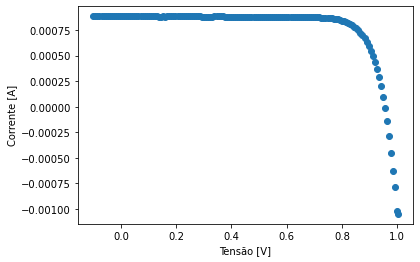

In [162]:
import matplotlib.pyplot as plt
I = np.array(array_IV)[:,1] # segunda coluna do dataframe, indice 1
V = np.array(array_IV)[:,0] # primeira coluna do dataframe, indice 0
plt.scatter(V, I)

plt.xlabel('Tensão [V]')
plt.ylabel('Corrente [A]')
# plt.xlim([0, df_V.max()])

In [150]:
import pvlib
import numpy as np

In [151]:
photocurrent, saturation_current, resistance_series, resistance_shunt, nNsVth = pvlib.ivtools.sde.fit_sandia_simple(V, I)

In [157]:
photocurrent # photocurrent [A]

0.0008827084991433769

In [158]:
saturation_current # dark (saturation) current [A]

6.087511039767829e-13

In [159]:
resistance_series # series resistance [ohm]

9.900909467374035

In [160]:
resistance_shunt # shunt (parallel) resistance [ohm]

128795.3341261829

In [156]:
nNsVth

0.046184677640298544